<a href="https://colab.research.google.com/github/katamaiah/GENAI/blob/main/Semantic_Spotter_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Starter Code

This code file contains a simple starting point for the Semantic Spotter project. Please feel free to modify it to suit your use case


option 1: insurance domain + build the rag pipeline using llamaindex
option2 : BYOP, come up with your own problem statement - clear objective, it should have some dataset(enterprise/personal).


Part 0 - Quick Recap of RAG

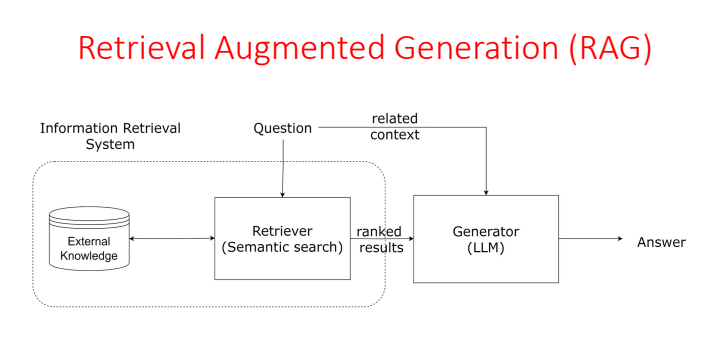

Without RAG: LLM's don't have any information on the domain/enterprise specific query.
With RAG: We are connecting an external data (ingested & transformed - embeddings - semantic search (dot product/cosine similarity) - top k relevant documents) - (context + user query)--> decorated using prompt engineering --> results

### Part 1 - Overall Product Specifications

***Problem Statement*** - Fans of Paul Graham's essays want a reliable way to ask questions and know whether Paul Graham has made comments on that topic or not. Paul Graham's essays are currently stored as separate documents a folder. Our task is to build a proper Q/A bot using RAG, that the users can interact with and get answers from.

***Solution Strategy*** - Build a POC which should solve the following requirements:

- Users would responses from PG's essay knowledge base
- If they want to refer to the original essay from which the bot is responding, the bot should provide a citation as well.

Goal - Solving the above two requirements well in the POC would ensure that the accuracy of the overall model is good and therefore further improvisations and customizations make sense.

***Data Used*** - Paul Graham's essays stored in a single folder

***Tools used*** - LlamaIndex (only for now) has been used due to its powerful query engine, fast data processing using data loaders and directory readers as well as easier and faster implementation using fewer lines of code.

### Part 2 - Solution POC

In this section, we go ahead and actually build a POC of the solution that we proposed in the previous step

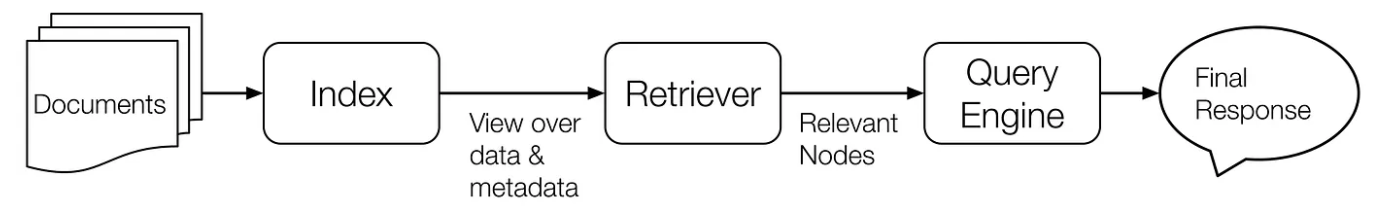

Parser feeds on the document, strides/moves over each content in a step manner.

AI:
1. Architecture (tough nut to crack - research)
2. Data
3. Compute (heavy backing of captial)

4 levels of LLM applications:
1. chatbot(LLM's internal memory) - openai, meta, google, microsoft, antrhopic, mistral, perplexity
2 chatbot with external memory(RAG) - llamindex, langchain,
3. Agents (LLM with tools) -langchain, llamaindex
4. LLM OS (LLM with tools, hardware(camera, mic, speaker,etc & an external memory) - Microsoft (memories)

Step 1 : Import the necessary libraries

In [ ]:
#Load llamaindex
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
#Loading docx2txt for document reading related dependencies
!pip install docx2txt

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=9301c74687f183937b8ae521399ca8b70c5c287f7bc65d07d30e79cb90714f26
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [ ]:
!pip install pypdf

In [ ]:
!pip install openai

In [ ]:

from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

Step 2 : Mount your Google Drive and Set the API key

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the API key
filepath = "/content/drive/MyDrive/upgrad/GenAI_Course_Master/RAG_llamaindex/"

with open(filepath + "OpenAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

Step 3 - Data Loading


***2 ways to do this***

- If you have a single file containing all the required data, use a data loader from [LLamahub](https://llamahub.ai/)

- If you have multiple files, use *Simple Directory Reader* Just ensure that for reading each file type the necessary dependency libraries are already installed.

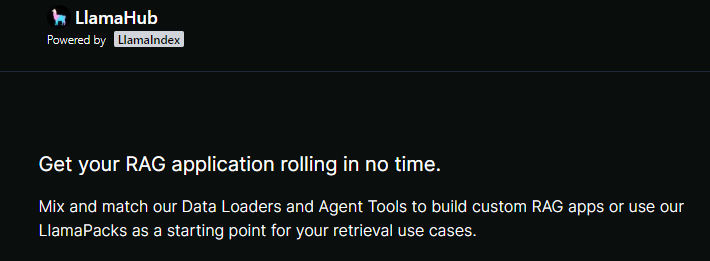

Recommendation - No matter how powerful the given data loader is, ensure that your file is properly formatted, and the loader is able to read the file clearly. Else the query engine might fail

In [ ]:
os.chdir("/content/drive/MyDrive/upgrad/GenAI_Course_Master/RAG_llamaindex")
!ls

 documents	       paul_graham_essay.txt				  tmp_image.png
 insurance-documents  'RAG Demonstration Notebook - Basic + LlamaIndex'   uber_2022.pdf
 OpenAI_API_Key.txt   'RAG Slides.pptx'


In [ ]:
from llama_index.core import SimpleDirectoryReader
reader = SimpleDirectoryReader(input_dir="/content/drive/MyDrive/upgrad/GenAI_Course_Master/RAG_llamaindex/")

In [ ]:
?SimpleDirectoryReader

In [ ]:
documents = reader.load_data()
print(f"Loaded {len(documents)} docs")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Loaded 154 docs


In [ ]:
!pip install python-pptx torch transformers python-pptx Pillow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.7 MB/s eta 0:00:00


In [ ]:
documents

[Document(id_='ce01ea9d-0740-45dd-a5b0-052fde485bf9', embedding=None, metadata={'file_name': 'essay1.docx', 'file_path': '/content/drive/MyDrive/Semantic_Spotter_Support/data2/essay1.docx', 'file_type': 'application/vnd.openxmlformats-officedocument.wordprocessingml.document', 'file_size': 22735, 'creation_date': '2024-01-14', 'last_modified_date': '2024-01-14', 'last_accessed_date': '2024-01-14'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, hash='7045cc4f21a8cf20d86bb7b1f1a7b6db9294ccf321c097ce87e2caedaf5dd4d7', text='One of the biggest things holding people back from doing great work is the fear of making something lame. And this fear is not an irrational one. Many great projects go through a stage early on where they don\'t seem very impressive, even to

In [ ]:
documents[2]

Document(id_='f2feac33-c0f3-4ad7-8452-c5fcda0ba38d', embedding=None, metadata={'page_label': '3', 'file_name': 'HDFC-Life-Group-Term-Life-Policy.pdf', 'file_path': '/content/drive/MyDrive/upgrad/GenAI_Course_Master/RAG_llamaindex/insurance-documents/HDFC-Life-Group-Term-Life-Policy.pdf', 'file_type': 'application/pdf', 'file_size': 874679, 'creation_date': '2024-07-20', 'last_modified_date': '2024-07-20'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \nF&U dated 15th October  2022                  UIN-101N169V0 2  P a g e  | 2                        \n Address    : \nMobile/Landline Number  :  \n \n \n \n \n \nA1 Free Look Provisions:  \n \nFor the Master Policyholder  \n \nThe Master Policyholder  shall have a period of 15 days  from the date of rec

Step 4 - Building the query engine

In [ ]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core import VectorStoreIndex
from IPython.display import display, HTML

# create parser and parse document into nodes
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)
# documents --> nodes

# # build index
index = VectorStoreIndex(documents)
#nodes --> index

# Construct Query Engine
query_engine = index.as_query_engine()

1 pdf(100 pages) -- 100 elements in a list (documents) --> chunks (word<--sentences<--paragrahps--pages<--pdf)

In [ ]:
parser

SentenceSplitter(include_metadata=True, include_prev_next_rel=True, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x7ce072d8c640>, id_func=<function default_id_func at 0x7ce07d50c310>, chunk_size=1024, chunk_overlap=200, separator=' ', paragraph_separator='\n\n\n', secondary_chunking_regex='[^,.;。？！]+[,.;。？！]?')

Step 5 - Checking respones and respone parameters

In [ ]:
response = query_engine.query("What is this document talking about?")

In [ ]:
#Checking the response
response.response

'This document is discussing the terms and conditions of a policy related to HDFC Life Group Term Life.'

In [ ]:
#Check the source node
response.source_nodes

[NodeWithScore(node=TextNode(id_='70125514-2045-4699-b1c9-0457d872209e', embedding=None, metadata={'file_name': 'essay2.docx', 'file_path': '/content/drive/MyDrive/Semantic_Spotter_Support/data2/essay2.docx', 'file_type': 'application/vnd.openxmlformats-officedocument.wordprocessingml.document', 'file_size': 20293, 'creation_date': '2024-01-14', 'last_modified_date': '2024-01-14', 'last_accessed_date': '2024-01-14'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='bb838dc8-faad-4e1d-80f3-7c1b90ea5cd6', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_name': 'essay2.docx', 'file_path': '/content/drive/MyDrive/Semantic_Spotter_Support/data2/essay2.docx', 'file_type': 'application/vnd.openxmlformats-offic

In [ ]:
index --

In [ ]:
#Extract the file name
response.source_nodes[0].node.metadata['file_name']

'essay2.docx'

In [ ]:
#Extract the score
response.source_nodes[1].score

0.8244619603772242

Step 6 - Creating a response Pipeline

User receives the response and the document that they can refer to

In [ ]:
## Query response function
def query_response(user_input):
  response = query_engine.query(user_input)
  file_name = response.source_nodes[0].node.metadata['file_name']
  final_response = response.response + '\n Check further at ' + file_name + ' document'
  return final_response

In [ ]:
def initialize_conv():
  print('Feel free to ask Questions regarding essays of Paul Graham. Press exit once you are done')
  while True:
    user_input = input()
    if user_input.lower() == 'exit':
      print('Exiting the program... bye')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:20px">{response}</p>'))

In [ ]:
initialize_conv()

Feel free to ask Questions regarding essays of Paul Graham. Press exit once you are done
What is the opinion of the author on AirBNBs


What is the author's opinion on Indian startups


What is the author's opinion on how to become a billionaire?


exit
Exiting the program... bye


Step 7 - Build a Testing Pipeline

Here we feed a series of questions to the Q/A bot and store the responses along with the feedback on whether it's accurate or not from the user

In [ ]:
questions = ['What does the author say about AirbNb?', "I want to be a billionaire. What does Paul Graham say about that?",
             'What is the opinion of the author on India?']

In [ ]:
def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    test_feedback.append((i,query_response(i),user_input))
  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Good or Bad'])
  return feedback_df

In [ ]:
import pandas as pd

In [ ]:
testing_pipeline(questions)

What does the author say about AirbNb?
The author describes Airbnb as a startup that initially faced challenges and had no growth. However, the founders of Airbnb were incredibly determined and hardworking, constantly implementing new ideas and taking notes during conversations. Despite facing financial difficulties and skepticism from investors, the founders did not give up because they had a positive experience as hosts and believed they had discovered something new. The author also mentions that Airbnb's goal during Y Combinator was to reach "ramen profitability," which means making enough money to cover the founders' living expenses. The founders focused on the hottest subset of the market, which was New York City, and worked closely with hosts to improve their listings. Eventually, their efforts paid off, and Airbnb started experiencing real growth, becoming ramen profitable.
 Check further at essay2.docx document

 Please provide your feedback on the response provided by the bot


Question  \
0             What does the author say about AirbNb?   
1  I want to be a billionaire. What does Paul Gra...   
2        What is the opinion of the author on India?   

                                            Response Good or Bad  
0  The author describes Airbnb as a startup that ...        Good  
1  Paul Graham says that the most reliable way to...         Bad  
2  The given context does not provide any informa...        Good

### Part 3 - Next Steps/ Overall Recommendations



- Based on the testing pipeline's feedback develop a strategy on how to improve the POC further
  - This can be through building a better/cleaner dataset, or utilizing better data pre-processing techniques
- If the accuracy is good enough, think of implementing some more use cases and user stories. Maybe a set of users want to do XYZ, and that requirement needs to be implemented in the solution. Think of a proper tool that can enable you to do that.
- Few suggestions based on the common tools that we have in the pipeline